In [4]:
import os 
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

c:\Users\eurhope\Desktop\DFG\geowatchlab\3_prix_alim\batch9_geowatchlabs-3-markets\src\notebooks
c:\Users\eurhope\Desktop\DFG\geowatchlab\3_prix_alim\batch9_geowatchlabs-3-markets\src


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes
from shapely import geometry
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

file_agg = './aggregated_match_for_FSMS_files_with_yields_with_price.csv'
file_agg = './standardized_aggregated_dataset.csv'


df_raw = pd.read_csv(file_agg)

df = df_raw.dropna(subset={'month'})


C:\Users\eurhope\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,7,8,15,17,40,42,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


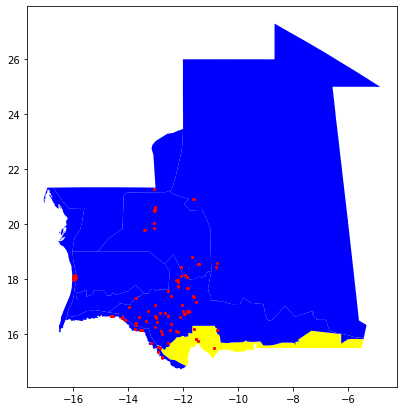

In [7]:
# -*- coding: utf-8 -*-

list_yield = df.sorghum.unique()
list_yield = df.millet.unique()

list_month = df.month.unique()
list_year = df.year.unique()
list_village = list(df.villag.unique())

#file_moughataa = './Moughataas.geojson'
file_moughataa_new = './Moughataas_new.geojson'
file_commune = './Communes.geojson'
file_zone_me = "./Zones de moyen d'existence.geojson"

moughataa = gpd.read_file(file_moughataa_new)
commune = gpd.read_file(file_commune)
zone_me = gpd.read_file(file_zone_me)

#moughataa.plot()
#zone_me.plot()

#
# FIND MOUGHATHA AND COMMUNE OVERLAPPING AREA OF INTEREST
#

# ZONE DE CULTURE PLUVIALE
area_culture_polygon = zone_me[zone_me['LZNUM'] == 9].geometry

for i in range(len(commune.index)):
    commune_polygon = commune.loc[i, 'geometry']
    intersect = area_culture_polygon.intersection(commune_polygon)    
    if intersect.is_empty.iloc[0]:
        commune.loc[i, 'in_culture_area'] = False
    else:
        commune.loc[i, 'in_culture_area'] = True
        

for i in range(len(moughataa.index)):
    moughataa_polygon = moughataa.loc[i, 'geometry']
    intersect = area_culture_polygon.intersection(moughataa_polygon)
    if intersect.is_empty.iloc[0]:
        moughataa.loc[i, 'in_culture_area'] = False
    else:
        moughataa.loc[i, 'in_culture_area'] = True
        
commune_selected = commune[commune['in_culture_area'] == True]
moughataa_selected = moughataa[moughataa['in_culture_area'] == True]

#commune_selected.plot()
#moughataa_selected.plot()

list_moughataa_selected = list(moughataa_selected['X.1'])

list_data_moughataa = df.moughataa_geomatch.unique()

#
# FIND HOUSEHOLDS LOCATION, COMPARISON WITH AREA OF INTEREST
#

data = df.dropna(subset={'latitude'}).reset_index(drop=True)
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(data["longitude"], data["latitude"])]
geodata=gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

# check if commune is in zone 

#for i in range(len(data.index)):
#    data_polygon = Point(data.loc[i, 'latitude'], data.loc[i, 'longitude'])
#   # data.loc[i,'geometry'] = data_polygon
#    check = area_culture_polygon.contains(data_polygon).iloc[0]
#    
#    if check:
#        data.loc[i, 'in_culture_area'] = True
#    else:
#        data.loc[i, 'in_culture_area'] = False

data2 = data[data['year'] == 2014]
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(data2["longitude"], data2["latitude"])]
geodata=gpd.GeoDataFrame(data2,crs=crs, geometry=geometry)

area_culture_polygon_other = zone_me[zone_me['LZNUM'] != 9].geometry

fig, ax = plt.subplots(figsize=(7,7))
area_culture_polygon.plot(ax=ax, color = 'yellow')
area_culture_polygon_other.plot(ax=ax, color = 'blue')
geodata.plot(ax=ax, color='red', markersize=1)
plt.show()